In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('10-dataset.csv')

In [3]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
colA=np.array(data.total_bill)
colB=np.array(data.tip)


In [5]:
mcolA=np.mat(colA)
mcolB=np.mat(colB)


In [6]:
#horizontal stacking
m=np.shape(mcolA)[1]
one=np.ones((1,m),dtype=int)

In [7]:
x=np.hstack((one.T,mcolA.T))

In [8]:
def kernal(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye(m))
    
    for j in range(m):
        diff=point-x[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [9]:
def localweight(point,xmat,ymat,k):
    wt=kernal(point,xmat,k)
    w=(x.T*(wt*x)).I*(x.T*wt*ymat.T)
    return w

In [10]:
def LocalWeightedRegg(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localweight(xmat[i],xmat,ymat,k)
    return ypred

In [11]:
ypred=LocalWeightedRegg(x,mcolB,0.5)

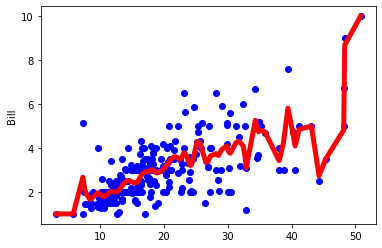

In [12]:
xsort=x.copy()
xsort.sort(axis=0)
plt.scatter(colA,colB,color='blue')
plt.plot(xsort[:,1],ypred[x[:,1].argsort(0)],color='red',linewidth=5)
plt.ylabel('Tip')
plt.ylabel('Bill')
plt.show()